In [2]:
! pip install split-folders

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
import tensorflow as tf
import splitfolders 
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import itertools
import plotly.express as px
#Suppressing Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [4]:
data_dir = "../input/animals10/raw-img"
data_dir = pathlib.Path(data_dir)

In [5]:
Total_Images = glob.glob('../input/animals10/raw-img/*/*.jpeg')
print("Total Number of Images", len(Total_Images))
Total_Images = pd.Series(Total_Images)

Total Number of Images 24209


In [6]:
Total_Df = pd.DataFrame()

Total_Df['FileName'] = Total_Images.map(lambda ImageName :ImageName.split("H")[-1])

Total_Df['ClassId'] = Total_Images.map(lambda ImageName :ImageName.split("/")[-2])

Total_Df.head()

,FileName,ClassId
0,aJ4.jpeg,cavallo
1,../input/animals10/raw-img/cavallo/OIP-TPYKs3X...,cavallo
2,aE2.jpeg,cavallo
3,aEK.jpeg,cavallo
4,aFj.jpeg,cavallo


In [7]:
Class_Id_Dist_Total = Total_Df['ClassId'].value_counts()
Class_Id_Dist_Total.head(10)

cane          4863
ragno         4497
gallina       3098
cavallo       2623
mucca         1866
scoiattolo    1862
farfalla      1650
pecora        1444
gatto         1227
elefante      1079
Name: ClassId, dtype: int64

In [8]:
splitfolders.ratio(data_dir, output="output", seed=101, ratio=(.8, .1, .1))

Copying files: 26179 files [01:45, 247.11 files/s]


In [13]:
train_path='./output/train/'
val_path='./output/val'
test_path='./output/test'
class_names=os.listdir(train_path)
class_names_val=os.listdir(val_path)
class_names_test=os.listdir(test_path)

In [14]:
train_image1 = glob.glob('./output/train/*/*.jpeg')

Total_TrainImages = train_image1 
print("Total number of training images: ", len(Total_TrainImages))


test_image1 = glob.glob('./output/test/*/*.jpeg')

Total_TestImages = test_image1
print("Total number of test images: ", len(Total_TestImages))



Val_image1 = glob.glob('./output/val/*/*.jpeg')

Total_ValImages = Val_image1 
print("Total number of val images: ", len(Total_ValImages))

Total number of training images:  19366
Total number of test images:  2447
Total number of val images:  2396


In [15]:
train_image_names = pd.Series(Total_TrainImages)
train_df = pd.DataFrame()

# generate Filename field
train_df['Filename'] = train_image_names.map( lambda img_name: img_name.split("/")[-1])


# generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name: img_name.split("/")[-2])

train_df.head()

,Filename,ClassId
0,OIP-CYCE6NlQDVazRC9dNikf4QAAAA.jpeg,pecora
1,OIP-H3BYOUMKSkq-HTamw3iK8wHaE8.jpeg,pecora
2,OIP-QdkBBGtOOOYoDZX5U7wMwgHaCe.jpeg,pecora
3,OIP-L-gQMkZtpVg5mmV0LC5r-gAAAA.jpeg,pecora
4,OIP-BZpDuVZQxABpH9vxBg7ynQAAAA.jpeg,pecora


In [16]:
class_id_distribution_Train = train_df['ClassId'].value_counts()
class_id_distribution_Train.head(10)

cane          3890
ragno         3600
gallina       2478
cavallo       2098
mucca         1492
scoiattolo    1489
farfalla      1324
pecora        1155
gatto          984
elefante       856
Name: ClassId, dtype: int64

In [17]:
val_image_names = pd.Series(Total_ValImages)
val_df = pd.DataFrame()

# generate Filename field
val_df['Filename'] = val_image_names.map( lambda img_name: img_name.split("/")[-1])


# generate ClassId field
val_df['ClassId'] = val_image_names.map(lambda img_name: img_name.split("/")[-2])

val_df.head()

,Filename,ClassId
0,OIP-tYBmbM80i_OfYzZUv3MlyAHaEo.jpeg,pecora
1,OIP-sWhAckYnDojjraKjmAeQWgHaDf.jpeg,pecora
2,OIP-cbmIMSyNg74yWJJsVXvDhgHaFj.jpeg,pecora
3,OIP-xPLC7gOOqvuXuHr4AEU-AgHaHu.jpeg,pecora
4,OIP-2zIVhej0wUkbJDbbL2LvyAHaE8.jpeg,pecora


In [18]:
class_id_distribution_val = val_df['ClassId'].value_counts()
class_id_distribution_val.head(10)

cane          486
ragno         449
gallina       309
cavallo       262
scoiattolo    186
mucca         186
farfalla      164
pecora        133
gatto         113
elefante      108
Name: ClassId, dtype: int64

In [19]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True)
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False)
val_generator = val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=32,shuffle=False)

Found 20938 images belonging to 10 classes.
Found 2627 images belonging to 10 classes.
Found 2614 images belonging to 10 classes.


In [22]:

# Callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Transfer Learning Models
from tensorflow.keras.applications import ResNet50, ResNet50V2, InceptionV3, Xception, ResNet152, ResNet152V2

n_classes=10

In [23]:
print("Shape of train data:", train_generator[0][0].shape)
print("Shape of train labels:", train_generator[0][1].shape)

model = ResNet50(
      input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet'
    )

Shape of train data: (32, 224, 224, 3)
Shape of train labels: (32, 10)
94765736/94765736 [==============================] - 4s 0us/step


In [24]:
for layers in model.layers:
    layers.trainable = False

In [25]:
from keras.layers import  Dropout
y = Flatten()(model.output)
y = Dropout(0.5)(y)
y = Dense(10, activation = "softmax")(y)

model = keras.Model(model.input, y)
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [26]:
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=20)
mc = ModelCheckpoint('./kaggle/working/model.h5', monitor='val_accuracy', mode='max' )
History = model.fit(train_generator,validation_data=val_generator,epochs=15,verbose=1, callbacks=[mc,es])

Epoch 1/15
655/655 [==============================] - 263s 388ms/step - loss: 4.9694 - accuracy: 0.8249 - val_loss: 3.7171 - val_accuracy: 0.9051
Epoch 2/15
655/655 [==============================] - 253s 386ms/step - loss: 4.8982 - accuracy: 0.8852 - val_loss: 4.6808 - val_accuracy: 0.9074
Epoch 3/15
655/655 [==============================] - 255s 389ms/step - loss: 4.8576 - accuracy: 0.8982 - val_loss: 4.7526 - val_accuracy: 0.9220
Epoch 4/15
655/655 [==============================] - 253s 387ms/step - loss: 4.9730 - accuracy: 0.9073 - val_loss: 4.7527 - val_accuracy: 0.9239
Epoch 5/15
655/655 [==============================] - 253s 386ms/step - loss: 4.7245 - accuracy: 0.9156 - val_loss: 4.8661 - val_accuracy: 0.9315
Epoch 6/15
655/655 [==============================] - 255s 390ms/step - loss: 5.2509 - accuracy: 0.9150 - val_loss: 5.1830 - val_accuracy: 0.9338
Epoch 7/15
655/655 [==============================] - 255s 389ms/step - loss: 5.0677 - accuracy: 0.9230 - val_loss: 5.5563 -

In [29]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator), verbose=1)
print('Loss: %.3f' % (test_loss * 100.0))
print('Accuracy: %.3f' % (test_acc * 100.0)) 

83/83 [==============================] - 6s 75ms/step - loss: 7.4219 - accuracy: 0.9383
Loss: 742.189
Accuracy: 93.833


In [31]:
from sklearn.metrics import classification_report
y_val = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)
print(classification_report(y_val,y_pred))


83/83 [==============================] - 7s 71ms/step
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       487
           1       0.91      0.93      0.92       263
           2       0.88      0.97      0.92       146
           3       0.98      0.93      0.95       212
           4       0.95      0.96      0.96       311
           5       0.94      0.86      0.90       168
           6       0.90      0.86      0.88       188
           7       0.92      0.92      0.92       182
           8       0.97      0.98      0.98       483
           9       0.94      0.95      0.94       187

    accuracy                           0.94      2627
   macro avg       0.93      0.93      0.93      2627
weighted avg       0.94      0.94      0.94      2627



In [32]:
class_indices = test_generator.class_indices
indices = {v:k for k,v in class_indices.items()}
filenames = test_generator.filenames

In [33]:
val_df = pd.DataFrame()
val_df['filename'] = filenames
val_df['actual'] = y_val
val_df['predicted'] = y_pred
val_df['actual'] = val_df['actual'].apply(lambda x: indices[x])
val_df['predicted'] = val_df['predicted'].apply(lambda x: indices[x])
val_df.loc[val_df['actual']==val_df['predicted'],'Same'] = True
val_df.loc[val_df['actual']!=val_df['predicted'],'Same'] = False
val_df.head(10)

,filename,actual,predicted,Same
0,cane/OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg,cane,cane,True
1,cane/OIP--DQsiH-9LglDNlEvJpZQZQHaFw.jpeg,cane,cane,True
2,cane/OIP--OzHmoOBxcUQs7N3KjButwHaFP.jpeg,cane,gallina,False
3,cane/OIP--Z2dg_o5sGo8jua-d6vSagHaEK.jpeg,cane,cane,True
4,cane/OIP--hrVyxBHfXGXIpLKB_ld2AHaEK.jpeg,cane,cane,True
5,cane/OIP--iPPduM2--389E1lozUz_QHaFj.jpeg,cane,cane,True
6,cane/OIP--khXa4p9B3QV8JmsHX29hgHaEK.jpeg,cane,cane,True
7,cane/OIP-00zvckpZ8XDEzk-Fv4HjkQHaGL.jpeg,cane,cane,True
8,cane/OIP-0ERf2k91vjSIq_POpXYImwHaFj.jpeg,cane,cane,True
9,cane/OIP-0G1lmzPnTshwQJ_IEMNHgQHaFR.jpeg,cane,cane,True


In [34]:
cm = confusion_matrix(y_true=y_val, y_pred=y_pred)

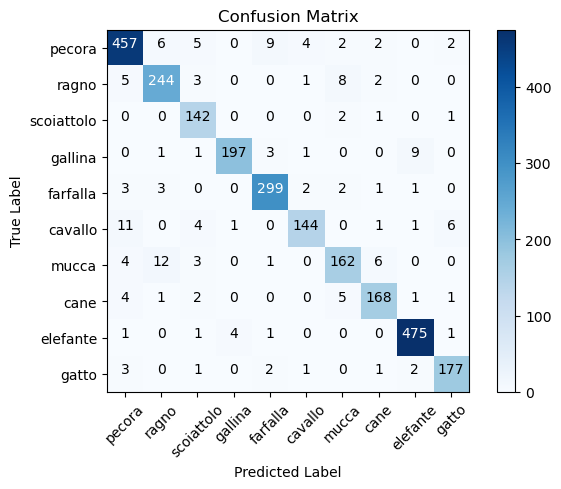

In [42]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
   plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation= 45)
plt.yticks(tick_marks, class_names)


thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()